## Titanic Data Analysis

By Manuel Alejandro Sanchez

### Introduction

The purpose of this project is to build an analysis from the Titanic Survivors data set provided by Kaggle using Pandas and Numpy dependencies within Python. [(Kaggle: Titanic)](https://www.kaggle.com/c/titanic) This data set contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. In this data investigation I will focus in analysing the factors that made it more likely for a person to survive on the Titanic. Our established hypothesis is that higher class passengers, females, and younger people had a higher chance of surviving. 

### Data Investigation
I will begin by browsing the data structure and understanding what variables are included in the data, particularly the meaning and type of each variable and if necessary convert variables into format that is fit for data analysis.

Once I am able to understand variables, I will explore and understand my dataset by answering useful questions using panda and matplotlib to bring together useful insights into graphs. I will also use descriptive statistics to define correlation between survivors and nonsurvivors. The variables that showed evident difference between two groups are likely to have had an impact on chance of survival.


#### Loading Data
To begin I will import pandas for data structure analisis and matplotlib for ploting graphs using python and load data from csv file. 

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
data = pd.read_csv("titanic_data.csv") 

###### *What is the size of my data set?*

From my evaluation I can confirm that the size of our data set has 891 rows and 12 columns by calling the following:

In [238]:
#Find length of data
#len(data)
# Look at the shape of the dataFrame object, and it has 891 rows and 12 columns.
data.shape 

(891, 12)

##### *What variables are within data structure?*

In [239]:
# Build data structure sample. 
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Below I have attached description to each variable.

| Variable Name |  Variable Description | 
|---------------|-----------------------|
|PassengerID| Passenger ID|
|   Survived  |  Survival (0 = No;1 = Yes)|
|Pclass|Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
|Name|Name|
|Sex|Sex|
|Age|Age|
|SibSp| Number of Siblings/Spouses Aboard|
|Parch|Number of Parents/Children Aboard|
|Ticket|Ticket Number|
|Fare|Passenger Fare|
|Cabin|Cabin|
|Embarked|Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

Now that I am able to understand our variables, I could dive into evaluating if we have any missing fields within our data set.

In [240]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [246]:
# Check whether the columns to be analyzed having any missing values, how many missing values each column has.
def null_count(data):
    data_null = pd.isnull(data)
    data_null_true = data[data_null == True]
    null_count = len(data_null_true)
    return null_count
data.apply(null_count) # Let's check how many missing values each column has. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### *Discussion: *
I have establish that there are missing fields within our data (Age, Cabin, and Embarked). Missing a lot of Age data does affect our age evaluation, however, a possible solution would be to replace empty fields with an estimated average.

Missing the vast majority of Cabin data is be a bit problematic when evaluating how far away from possible safety this cabin was located. However, for the sake of this evaluation I will continue to analysis without omitting any data.

### *Plotting Data*

##### *Plotting Passenger Survival Data*
*How many passengers survived?*

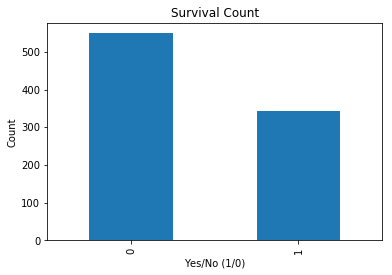

In [124]:
data['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Count")

In [36]:
#Find Survival count
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

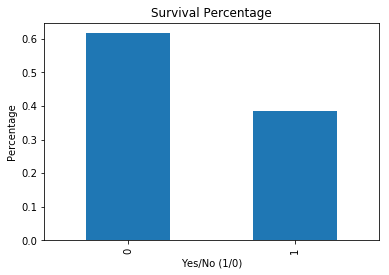

In [22]:
#Find Normalized Survival Percentage
data['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title("Survival Percentage")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Percentage")

In [37]:
#Find Survival Percentage
data['Survived'].value_counts()*100/len(data)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Discussion: From my evaluation of this sample data set, I find that about 38% (342) survived and 62% (549 did not survive.

#####  *Plotting Male/Female Distribution Data*
*How many male and female are counted within data set?*

*What was the survival distribution based on Sex?*

In [38]:
#Find Sex count
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

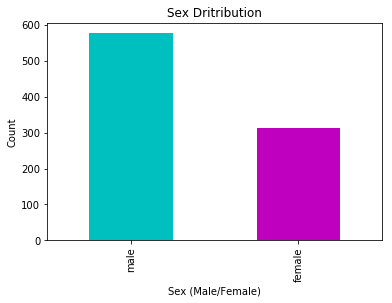

In [108]:
#Plot Sex Count
data['Sex'].value_counts().plot(kind='bar',
                                color=['c','m'])
plt.title("Sex Dristribution")
plt.xlabel("Sex (Male/Female)")
plt.ylabel("Count")

Discussion: There are far more male passengers than female passengers in the data.

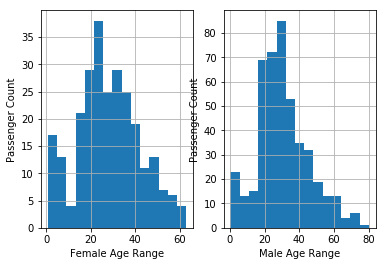

In [67]:
fig = plt.figure()
fig1 = fig.add_subplot(1,2,1)
plt.xlabel("Female Age Range")
plt.ylabel("Passenger Count")
data[data['Sex']=="female"]['Age'].hist(bins=15)
fig2 = fig.add_subplot(1,2,2)
data[data['Sex']=="male"]['Age'].hist(bins=15)
plt.xlabel("Male Age Range")
plt.ylabel("Passenger Count")

In [202]:
# Male Survival Distribution
data[data['Sex'] == 'male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [201]:
data[data['Sex'] == 'male']['Survived'].value_counts()*100/len(data)

0    52.525253
1    12.233446
Name: Survived, dtype: float64

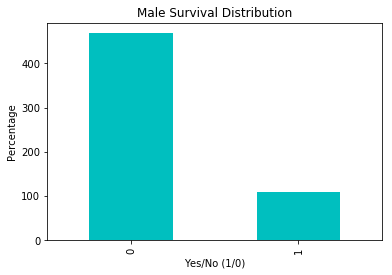

In [200]:
data[data['Sex'] == 'male']['Survived'].value_counts().sort_index().plot(kind='bar', color=['c'])
plt.title("Male Survival Distribution")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Percentage")

In [162]:
# Female Survival Distribution
data[data['Sex'] == 'female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [203]:
data[data['Sex'] == 'female']['Survived'].value_counts()*100/len(data)

1    26.150393
0     9.090909
Name: Survived, dtype: float64

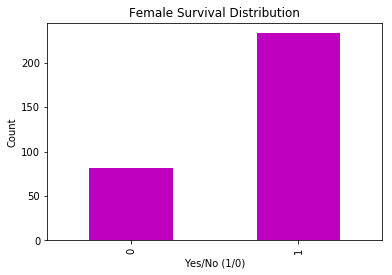

In [223]:
data[data['Sex'] == 'female']['Survived'].value_counts().sort_index().plot(kind='bar', color=['m'])
plt.title("Female Survival Distribution")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Count")

In [225]:
data.groupby('Sex')['Survived'].mean() # The tentative conclusion is that female has a much higher survival rate than male.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

###### *Discussion:*
Proportionately more males died relative to females. Only 19% where male passengers and 74% of the 342 survivors where female passengers. Historically, "women and children first" is a phrase that was first coined on the British HMS Birkenhead, which sunk in 1852. Titanic, which also departed from Britain, likely encountered the same informal policy, handed down culturally through the British seas.

### *Plotting Passenger Age Distribution *
*What are the lowest and largest Age values?*

*What was the survival distribution based on Age?*

In [30]:
#Find lowest and Largest Age value 
data['Age'].min(), data['Age'].max()

(0.41999999999999998, 80.0)

In [61]:
# Take a closer look at the distribution of the age of passengers. It has a wide range of age span.
data['Age'].describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

###### *Discussion:*
From my evaluation I find that the youngest was probably a baby just a few months old with a value converted to decimal. The age distributions for male and female passengers on board are similar. Most passengers are adults below 40s and there are also a few children and senior citizens on abroad.

In [136]:
# Define an age group for different ranges of age.
def age_group(age):
    if age < 18:
        return "young" 
    if 18 <= age < 60:
        return "adult"
    if age >= 60:
        return "senior"  
data["age_group"] = data["Age"].apply(age_group)

In [170]:
data.groupby(["age_group"])['Survived'].mean()

age_group
adult     0.386087
senior    0.269231
young     0.539823
Name: Survived, dtype: float64

###### *Discussion:* 
53% of the 342 survivors seem to have been young (age<18) passengers.*


In [230]:
#Positive Survival/Age Distribution
#data[data['Survived'] == 1]['Age'].value_counts()

In [231]:
#Negative Survival/Age Distribution
#data[data['Survived'] == 0]['Age'].value_counts()

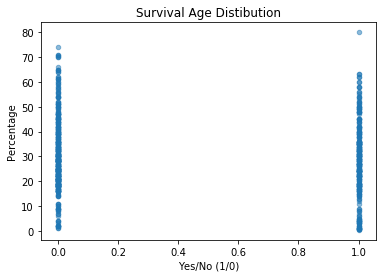

In [110]:
data.plot(kind='scatter', x='Survived', y='Age', alpha=.5)
plt.title("Survival Age Distribution Scattered Box Plot")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Percentage")

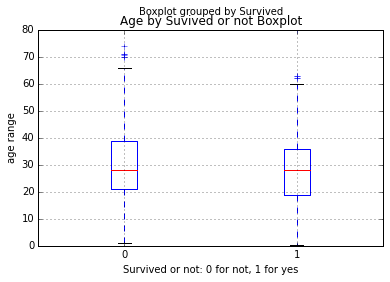

In [11]:
data.boxplot(column=["Age"],by=["Survived"])
plt.title("Survival Age Distribution")
plt.xlabel("Yes/No (1/0)")
plt.ylabel("Percentage")

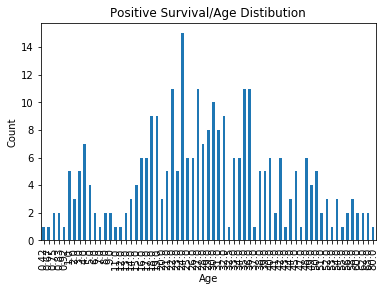

In [111]:
data[data['Survived'] == 1]['Age'].value_counts().sort_index().plot(kind='bar')
plt.title("Positive Survival/Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

In [112]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
data['AgeBin'] = pd.cut(data['Age'], bins)

###### *Discussion:* 
Based on previous graph it is hard to find correlation related to survival based on age. Since there is very large range of ages from our data set I would have to organize age ranges in bins to better understand visualization.

In [232]:
#Positive Survival/Age Distribution
data[data['Survived'] == 1]['AgeBin'].value_counts()

(20, 30]    84
(30, 40]    69
(10, 20]    44
(0, 10]     38
(40, 50]    33
(50, 60]    17
(60, 70]     4
(70, 80]     1
Name: AgeBin, dtype: int64

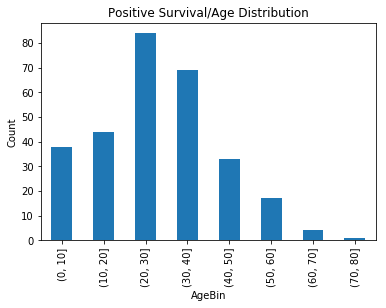

In [233]:
data[data['Survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')
plt.title("Positive Survival/Age Distribution")
plt.xlabel("AgeBin")
plt.ylabel("Count")

In [234]:
#Negative Survival/Age Distibution
data[data['Survived'] == 0]['AgeBin'].value_counts()

(20, 30]    146
(30, 40]     86
(10, 20]     71
(40, 50]     53
(0, 10]      26
(50, 60]     25
(60, 70]     13
(70, 80]      4
Name: AgeBin, dtype: int64

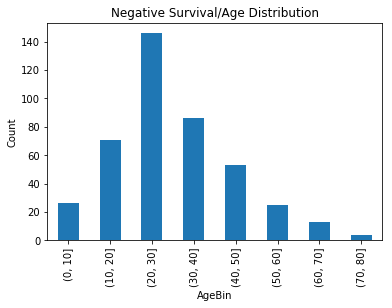

In [235]:
data[data['Survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')
plt.title("Negative Survival/Age Distribution")
plt.xlabel("AgeBin")
plt.ylabel("Count")

###### *Discussion:*
When comparing survivors and deaths based on age, the mean age for survivors was 28.164948 years and for deaths 29.705314 years. It's clear that there were a lot more younger survivors. Although I am able to visualize well the age distribution between survivors and nonsurvivors passengers it is still hard to correlate any relationship. It is possible that missing 177 Age fields has affects our overall analysis. Best if we had more data.

### Plotting Class Distribution
*What are the general demographics and passengers distibution by class (gender,age etc)?*

*How where passengers distributed between class within data set?*

*What was the survival distribution based on Class?*

In [236]:
#Passenger Count by Class Distribution
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

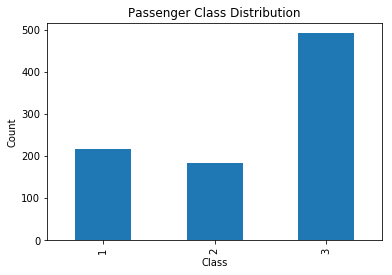

In [133]:
data['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title("Passenger Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

In [10]:
# Average age by class
data.groupby('Pclass')['Age'].mean() 
data.groupby('Pclass')[['Age']].describe()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

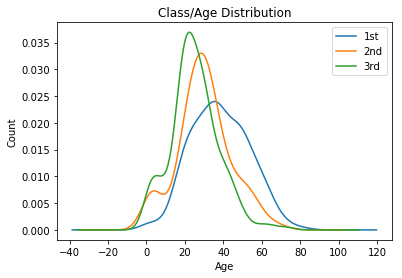

In [92]:
plt.subplot2grid
for x in [1,2,3]:
        data.Age[data.Pclass == x].plot(kind="kde")
plt.title("Class/Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(("1st", "2nd", "3rd")) 

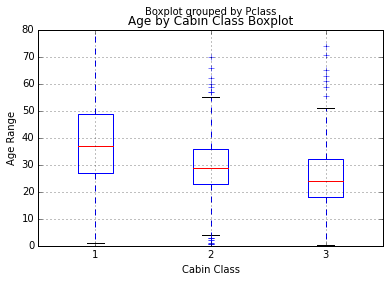

In [9]:
data.boxplot(column=["Age"],by=["Pclass"])
plt.title("Age by Cabin Class Boxplot")
plt.xlabel("Cabin Class")
plt.ylabel("Age Range")

###### *DIscussion*
Tentative conclusions is that, on average, first class passengers are usually older than the second class, and the ones in second class are older than the those in the third class.

In [192]:
data.groupby('Pclass')[['Survived']].describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

In [17]:
data.groupby('Pclass')[['Sex']].describe()

Sex                  
       count unique   top freq
Pclass                        
1        216      2  male  122
2        184      2  male  108
3        491      2  male  347

In [191]:
data.groupby('Pclass')[['Age']].describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

In [19]:
data.groupby('Pclass')[['Parch']].describe()

Parch                                             
        count      mean       std  min  25%  50%  75%  max
Pclass                                                    
1       216.0  0.356481  0.693997  0.0  0.0  0.0  0.0  4.0
2       184.0  0.380435  0.690963  0.0  0.0  0.0  1.0  3.0
3       491.0  0.393075  0.888861  0.0  0.0  0.0  0.0  6.0

In [20]:
data.groupby('Pclass')[['SibSp']].describe()

SibSp                                             
        count      mean       std  min  25%  50%  75%  max
Pclass                                                    
1       216.0  0.416667  0.611898  0.0  0.0  0.0  1.0  3.0
2       184.0  0.402174  0.601633  0.0  0.0  0.0  1.0  3.0
3       491.0  0.615071  1.374883  0.0  0.0  0.0  1.0  8.0

In [14]:
data.groupby('Pclass')['Survived'].sum() 

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [15]:
data.groupby('Pclass')['Survived'].mean() 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

###### *Discussion:*
It seems that first class passengers had a much higher chance of survival than the second class, also the second class has a higher rate of survival than the third class.

In [217]:
#Positive Class Survival Count
data[data['Survived'] == 1]['Pclass'].value_counts().sort_index()

1    136
2     87
3    119
Name: Pclass, dtype: int64

In [218]:
#Positive Class Survival Percentage
data[data['Survived'] == 1]['Pclass'].value_counts()*100/len(data)

1    15.263749
3    13.355780
2     9.764310
Name: Pclass, dtype: float64

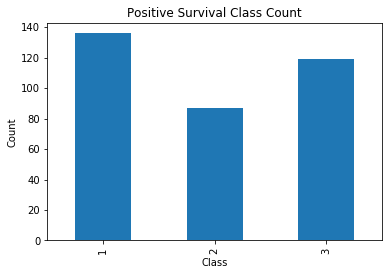

In [193]:
data[data['Survived'] == 1]['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title("Positive Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

In [140]:
#Negative Class Survival Count
data[data['Survived'] == 0]['Pclass'].value_counts().sort_index()

1    136
2     87
3    119
Name: Pclass, dtype: int64

In [219]:
#Negative Class Survival Percentage
data[data['Survived'] == 0]['Pclass'].value_counts()*100/len(data)

3    41.750842
2    10.886644
1     8.978676
Name: Pclass, dtype: float64

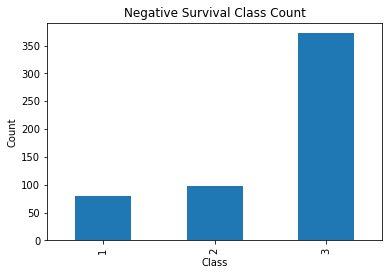

In [220]:
data[data['Survived'] == 0]['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.title("Negative Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

In [221]:
# Male Positive Survical Class Count
data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Pclass'].value_counts().sort_index()

1    45
2    17
3    47
Name: Pclass, dtype: int64

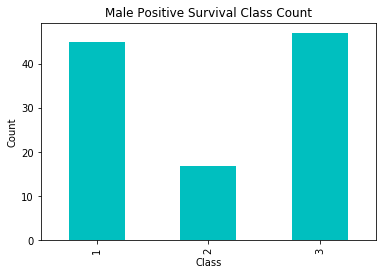

In [181]:
data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Pclass'].value_counts().sort_index().plot(kind='bar', color=['c'])
plt.title("Male Positive Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

In [209]:
#Male Negative Survival Class Count
data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Pclass'].value_counts().sort_index()

1     77
2     91
3    300
Name: Pclass, dtype: int64

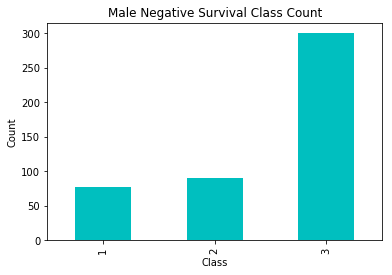

In [182]:
data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Pclass'].value_counts().sort_index().plot(kind='bar', color=['c'])
plt.title("Male Negative Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

In [156]:
# Female Positive Survival Class Count
data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Pclass'].value_counts().sort_index()

1    91
2    70
3    72
Name: Pclass, dtype: int64

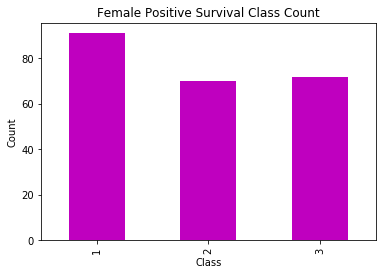

In [183]:
data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Pclass'].value_counts().sort_index().plot(kind='bar', color=['m'])
plt.title("Female Positive Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

In [154]:
#Female Negative Survival Class Count
data[(data['Sex'] == 'female') & (data['Survived'] == 0)]['Pclass'].value_counts().sort_index()

1     3
2     6
3    72
Name: Pclass, dtype: int64

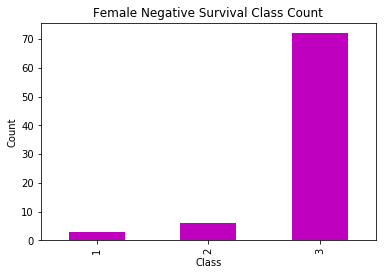

In [184]:
data[(data['Sex'] == 'female') & (data['Survived'] == 0)]['Pclass'].value_counts().sort_index().plot(kind='bar', color=['m'])
plt.title("Female Negative Survival Class Count")
plt.xlabel("Class")
plt.ylabel("Count")

###### *Discussion:*
The results indicate that 41.7% of the passengers on the ship were third class and died. From the first class passengers, 63% survived. 47% of the second class passengers survived. A mere 24% of the third class passengers survived. Based on initial glance, it appears that there is a correlation between survival rate and class.


### Plotting Embark Data
*What was passenger embark distribution?

In [161]:
#Embarked Distribution
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

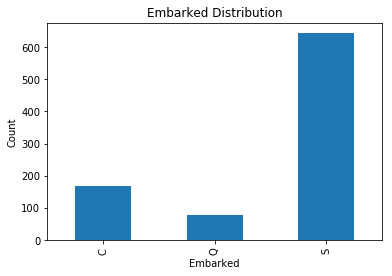

In [95]:
#Embarked Count Distribution
data['Embarked'].value_counts().sort_index().plot(kind='bar')
plt.title("Embarked Distribution")
plt.xlabel("Embarked")
plt.ylabel("Count")

### Plotting Fare/Age Data

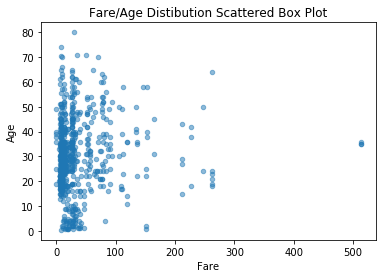

In [244]:
#Fare Age Distribution
data.plot(kind='scatter', x='Fare', y='Age', alpha=.5)
plt.title("Fare/Age Distibution Scattered Box Plot")
plt.xlabel("Fare")
plt.ylabel("Age")

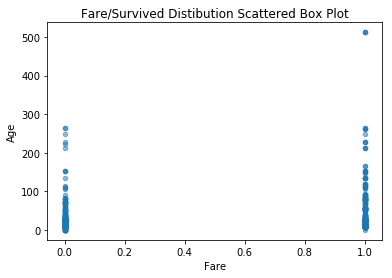

In [245]:
#Fare Age Distribution
data.plot(kind='scatter', x='Survived', y='Fare', alpha=.5)
plt.title("Fare/Survived Distibution Scattered Box Plot")
plt.xlabel("Fare")
plt.ylabel("Age")

### Results

##### *Summary Statistics*

            Table 1. Mean and standard deviation of main variables of full sample and subsamples by survival 

|Variable | All Passengers | Not Survived | Survived| 
|:--------:|:-----:|:--------:|:------------:|
|Female| 0.35 | 0.18 | 0.68 |
| |(0.48)|(0.35)|(0.47)|
|Age|29.70|30.63|28.34|
| |(14.53)|(14.17)|(14.95)|
|Fare|32.20|22.12|48.40|
| |(49.69)|(31.39)|(66.60)|
|1st Class|0.24|0.15|0.40|
| |(0.43)|(0.35)|(0.49)|
|2nd Class|0.21|0.18|0.25|
| |(0.41)|(0.38)|(0.44)|
|3rd Class|0.55|0.68|0.35|
| |(0.50)|(0.47)|(0.48)|
|Port Cherbourg|0.19|0.14|0.27|
| |(0.39)|(0.34)|(0.45)|
|Port Queenstown|0.09|0.09|0.09|
| |(0.28)|(0.28)|(0.28)|
|Port Southampton|0.72|0.78|0.63|
| |(0.45)|(0.42)|(0.48)|
|Number of Siblings/Spouse Aboard| 0.52|0.55|0.47|
| |(1.10)|(1.29)|(0.71)|
|Numer of Parents/Children Aboard|0.38|0.33|0.46|
| |(0.81)|(0.82)|(0.77)|
|*N_Age*|714|424|290|
|*N_Port*|889|549|340|
|*N*|891|549|342|

`Note: "Age", "Class", and "Port of Embarked" have missing values.` 

From the summary statistics above, we can see that the total number of passengers in this data set is 891, among which 549 (61.62%) died in the disaster and 342(38.38%) survived. A variety of factors may have determined who could survive from the disaster.

### Conclusion

###### Limitations

I have encountered several limitations from this analysis based on the data given. Having additional variables, beyond just the 12 varaibles we had available, would have been helpful. Also having more passenger data, beyond the 891 passengers listed in this data set, would have been helpful. Also having 687 Cabin data fields missing affected our understanding as to where each passenger could have been.

###### Factors for Survival

Our initial hypothesis was that upper class passengers, females, and young people had a larger chance of surviving.

###### Class

Based on initial glance, it appears that there is a correlation between survival rate and class. 41.7% of the passengers on the ship were 3rd class deaths. 

###### Gender

There is statistical evidence that points to the fact that a male had a smaller chance of surviving on the Titanic than a female. 18.9% of the males survived and 74.2% of the females survived. While it doesn't imply causation, there is strong evidence supporting the fact that this is very probable.

###### Age

Although I am able to visualize well the age distribution between survivors and nonsurvivors passengers it is still hard to correlate any relationship.  Compared to Seniors and Adults, it's clear that there were a lot more younger survivors. When comparing survivors and deaths based on age, the mean age for survivors was 28.164948 years and for deaths 29.705314 years.

###### Final Words

Overall, the strongest evidence for survival pointed to the passenger's class. Although we do not have any data relating to cabin location of each passenger, it is beleived that first class passengers may have had better access to the upper decks, which was possibly off limits to third class passengers. 

*Statistical Test*

Although, we generated some tentative conclusions based on our data analysis, this data still needs to be verified by conducting an in-depth statistical analysis. 